# 3D rotations

In [1]:
#setup the notebook for matplotlib
%matplotlib notebook

#all the libraries we will need
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import sin,cos,pi,exp,sqrt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
from IPython.display import display, Latex, Markdown

#this is the library that contains all the rigid body tranforms functions
import transforms


def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return str(''.join(rv))

In [2]:
def transform_cube(vertices, T):
    v_new = vertices.copy()

    for i in range(len(vertices)):
        v_aug = np.ones([4,1])
        v_aug[0:3,0] = vertices[i,:].transpose()
        v_aug_new = T.dot(v_aug)
        v_new[i,:] = v_aug_new[0:3,0]
    return v_new

def update_plot(ax, original_vert, vertices, T, axis=None):
    # generate list of sides' polygons of our pyramid
    sides = [ [vertices[0],vertices[1],vertices[2],vertices[3]],
              [vertices[0],vertices[1],vertices[5],vertices[4]],
              [vertices[2],vertices[3],vertices[7],vertices[6]],
              [vertices[7],vertices[6],vertices[5],vertices[4]],
           [vertices[0],vertices[3],vertices[7],vertices[4]],
           [vertices[1],vertices[2],vertices[6],vertices[5]]]
    orig_sides = [ [original_vert[0],original_vert[1],original_vert[2],original_vert[3]],
              [original_vert[0],original_vert[1],original_vert[5],original_vert[4]],
              [original_vert[2],original_vert[3],original_vert[7],original_vert[6]],
              [original_vert[7],original_vert[6],original_vert[5],original_vert[4]],
           [original_vert[0],original_vert[3],original_vert[7],original_vert[4]],
           [original_vert[1],original_vert[2],original_vert[6],original_vert[5]]]
    ax.clear()
    ax.scatter3D(vertices[:, 0], vertices[:, 1], vertices[:, 2], lw=2)
    # plot sides
    ax.add_collection3d(Poly3DCollection(sides, facecolors='red', linewidths=2, edgecolors='blue', alpha=.25))

    ax.scatter3D(original_vert[:, 0], original_vert[:, 1], original_vert[:, 2], c='r', linestyle='--')
    ax.add_collection3d(Poly3DCollection(orig_sides, facecolors='red', linewidths=2, edgecolors='blue', alpha=.25, linestyle='--'))

    vector_length = 4
    
    if axis is not None:
        print(axis)
        ax.plot3D([0,axis[0]*vector_length],[0,axis[1]*vector_length],[0,axis[2]*vector_length],'k',lw=6)
    
    ax.set_xlim3d([-vector_length,vector_length])
    ax.set_ylim3d([-vector_length,vector_length])
    ax.set_zlim3d([-vector_length,vector_length])
    ax.plot3D([-vector_length,vector_length],[0,0],[0,0],'--r',lw=2)
    ax.plot3D([0,0],[-vector_length,vector_length],[0,0],'--g',lw=2)
    ax.plot3D([0,0],[0,0],[-vector_length,vector_length],'--b',lw=2)

    x1 = T.dot(np.array([-5,0,0,1]))
    x2 = T.dot(np.array([5,0,0,1]))
    ax.plot3D([x1[0],x2[0]],[x1[1],x2[1]],[x1[2],x2[2]],'r',lw=2)
    x1 = T.dot(np.array([0,-5,0,1]))
    x2 = T.dot(np.array([0,5,0,1]))
    ax.plot3D([x1[0],x2[0]],[x1[1],x2[1]],[x1[2],x2[2]],'g',lw=2)
    x1 = T.dot(np.array([0,0,-5,1]))
    x2 = T.dot(np.array([0,0,5,1]))
    ax.plot3D([x1[0],x2[0]],[x1[1],x2[1]],[x1[2],x2[2]],'b',lw=2)

# ZYX Euler angles example

### Illustration of ZYX Euler Angles

<IPython.core.display.Javascript object>


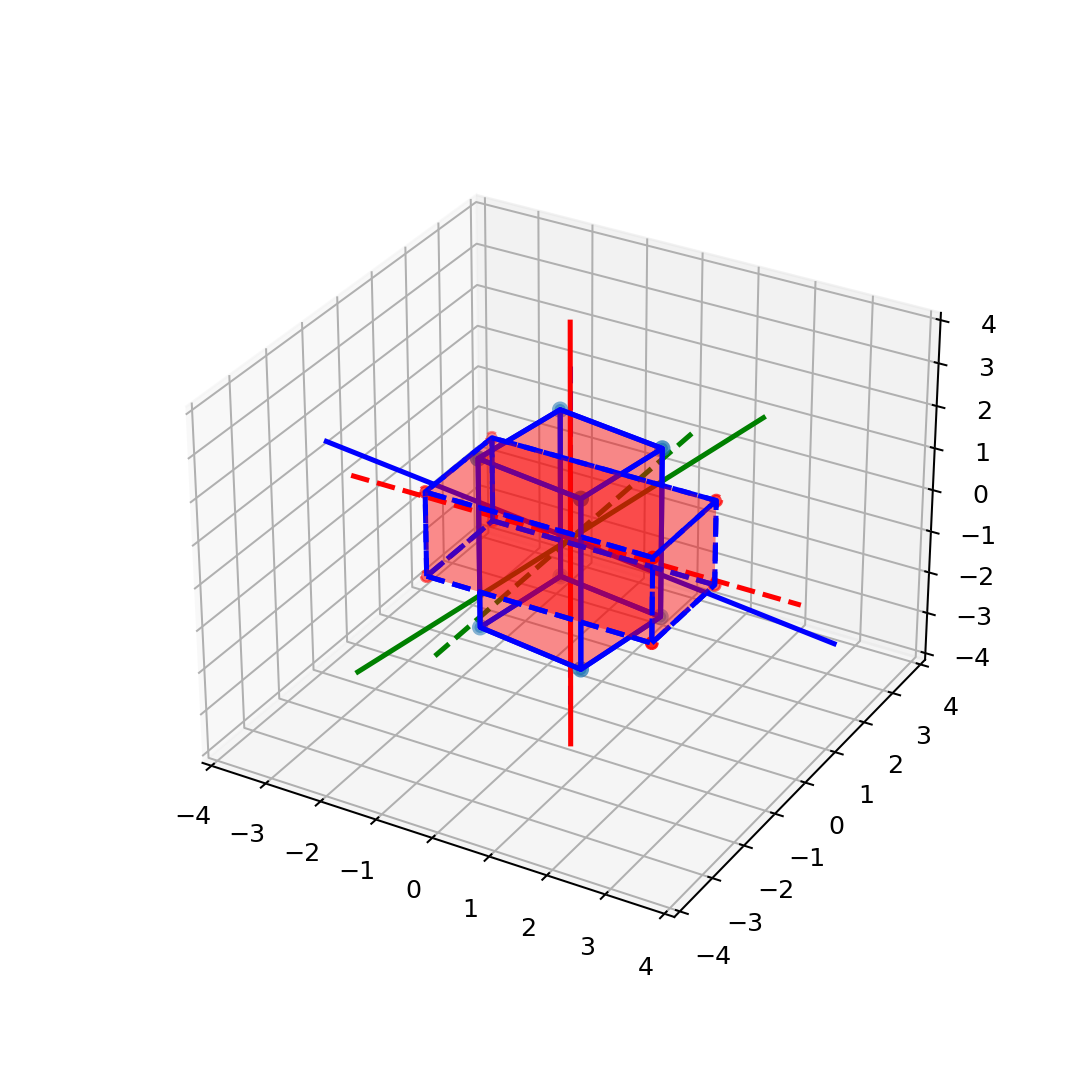

### Use the slider to the Euler Angles

interactive(children=(FloatSlider(value=0.0, description='alpha', max=3.14, min=-3.14, step=0.01), FloatSlider…

<function __main__.<lambda>(alpha, beta, gamma)>

In [6]:
def display_cube_ZYX(ax,alpha, beta, gamma):
    # vertices of a cube
    vertices = np.array([[-2., -1, -1], [2, -1, -1], [2, 1, -1],  [-2, 1, -1], 
                         [-2., -1, 1], [2, -1, 1], [2, 1, 1],  [-2, 1, 1]])

    
    # a rotation around z
    T_alpha = transforms.T_exp(np.array([0,0,0]), alpha*np.array([0,0,1]))
    # a rotation around y
    T_beta = transforms.T_exp(np.array([0,0,0]), beta*np.array([0,1,0]))
    # a rotation around x
    T_gamma = transforms.T_exp(np.array([0,0,0]), gamma*np.array([1,0,0]))
    
    T = T_alpha.dot(T_beta).dot(T_gamma)
    update_plot(ax, vertices, transform_cube(vertices,T), T)
    output = '$R_z = ' + bmatrix(T_alpha[0:3,0:3]) + ' \qquad '
    output += 'R_y = ' + bmatrix(T_beta[0:3,0:3]) + ' \qquad '
    output += 'R_x = ' + bmatrix(T_gamma[0:3,0:3]) + '$'
    display(Markdown(output))
    output = '$R_z \cdot R_y \cdot R_x = ' + bmatrix(T[0:3,0:3]) + '$'
    display(Markdown(output))
#     print('Rz =\n' + str(T_alpha[0:3,0:3]) + '\n\n')
#     print('Ry =\n' + str(T_beta[0:3,0:3]) + '\n\n')
#     print('Rx =\n' + str(T_gamma[0:3,0:3]) + '\n\n')
#     print('Rz*Ry*Rx = \n' + str(T[0:3,0:3]))
    
display(Markdown('### Illustration of ZYX Euler Angles'))
fig = plt.figure(figsize=[6,6])
ax = fig.add_subplot(111, projection='3d')
v = np.array([0,0,0])
w = np.array([0,0,0]) #pure rotation around y
display(Markdown('### Use the slider to the Euler Angles'))
interact(lambda alpha, beta, gamma: display_cube_ZYX(ax,alpha, beta, gamma), alpha=(-3.14,3.14,0.01), beta=(-3.14/2,3.14/2,0.01), gamma=(-3.14,3.14,0.01))

# Axis-angle representation

### Illustration of Axis/Angle representation

<IPython.core.display.Javascript object>


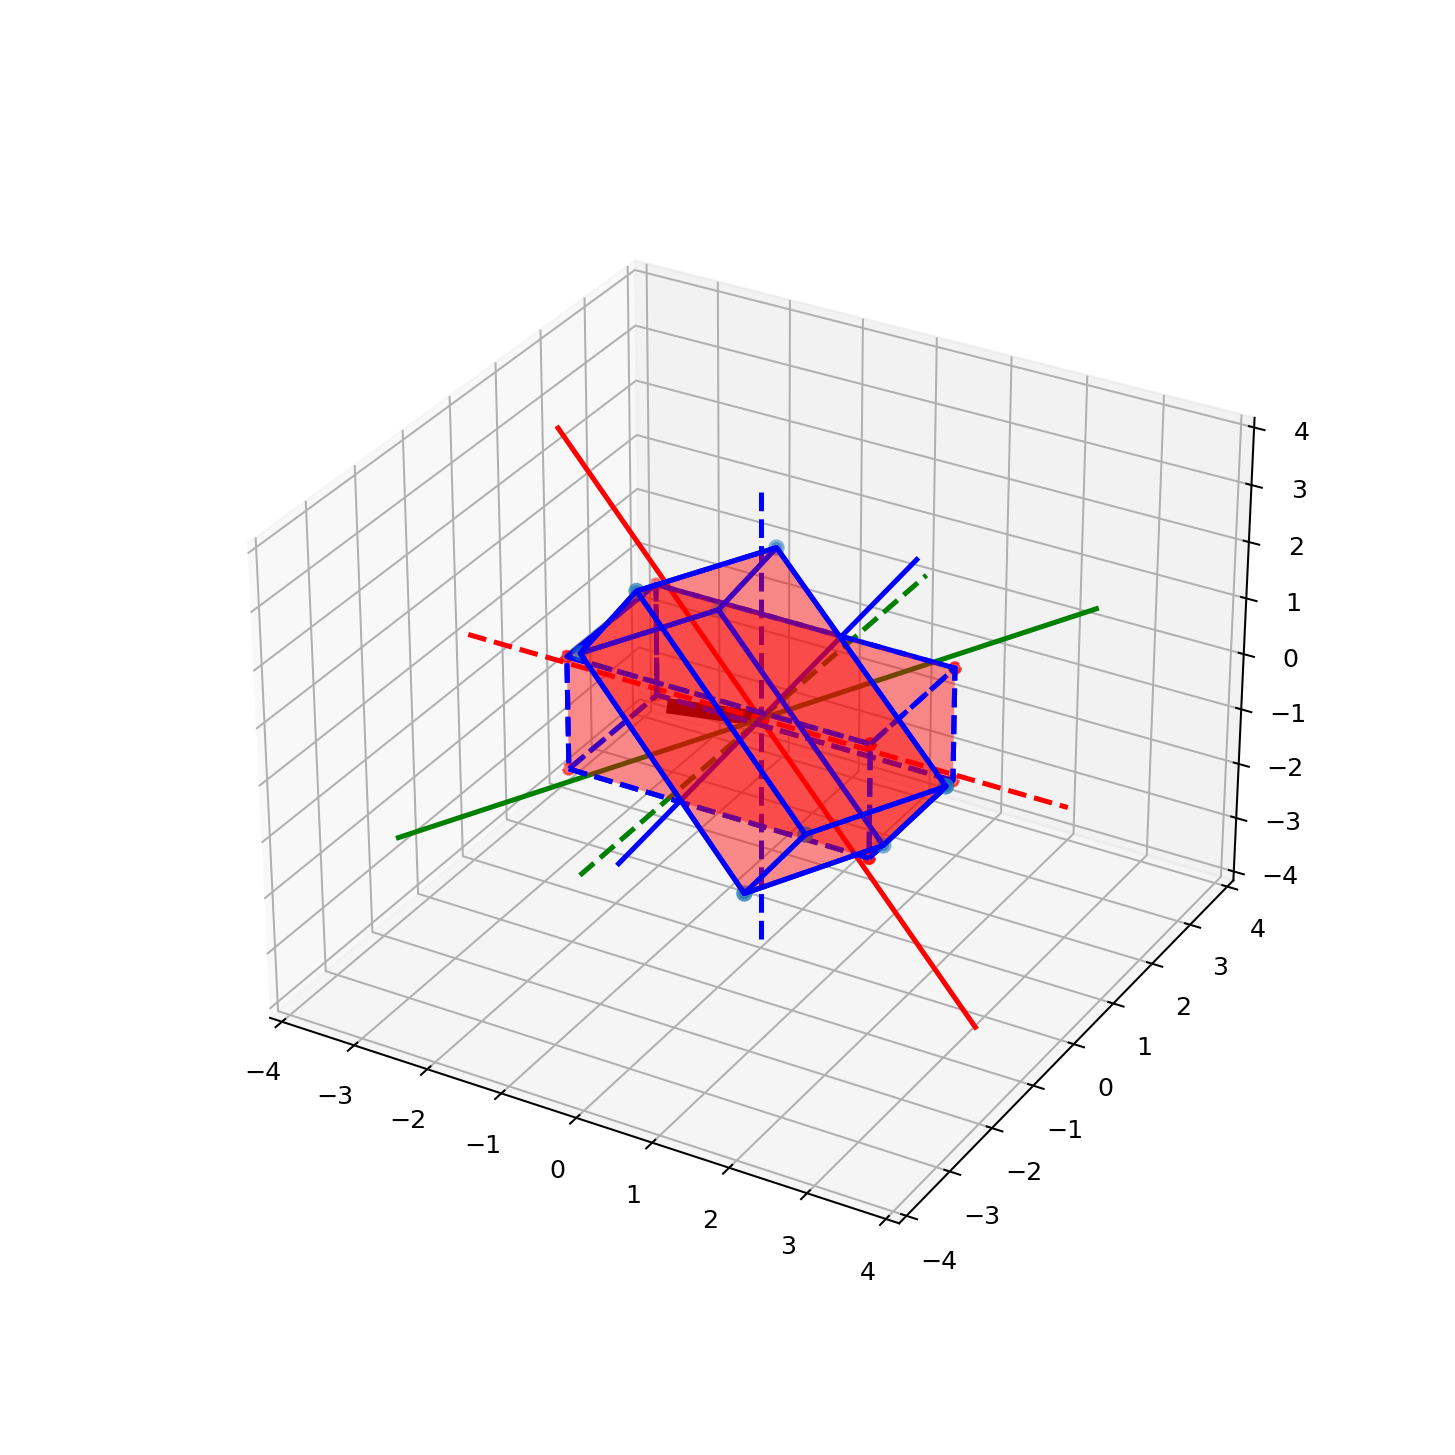

### Use the slider to set the axis and angle

interactive(children=(FloatSlider(value=0.7071067811865475, description='wx', max=1.0, min=-1.0, step=0.05), F…

<function __main__.<lambda>(wx, wy, wz, theta)>

In [5]:
def display_cube_axisAngle(ax,w, theta):
    # vertices of a cube
    vertices = np.array([[-2., -1, -1], [2, -1, -1], [2, 1, -1],  [-2, 1, -1], 
                         [-2., -1, 1], [2, -1, 1], [2, 1, 1],  [-2, 1, 1]])

    
    v = np.array([0,0,0])
    T = transforms.T_exp(theta*v,theta*w)
    
    output = 'Norm of w = ' + str(np.sqrt(w.T.dot(w))) + '\n'
    display(Markdown(output))
    
    update_plot(ax, vertices, transform_cube(vertices,T), T, axis=w)
    output = '$R = ' + bmatrix(T[0:3,0:3]) + '$'
    display(Markdown(output))
    
wx_widget = FloatSlider(min=-1.,max=1., step=0.05)
wy_widget = FloatSlider(min=-1.,max=1., step=0.05)
wz_widget = FloatSlider(min=-1.,max=1., step=0.05)

wx_widget.value = 1/np.sqrt(2)
wy_widget.value = -1/np.sqrt(2)
wz_widget.value = 0.

    
display(Markdown('### Illustration of Axis/Angle representation'))
fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(111, projection='3d')
v = np.array([0,0,0])
w = np.array([0,0,0]) #pure rotation around y
display(Markdown('### Use the slider to set the axis and angle'))
interact(lambda wx, wy, wz, theta: display_cube_axisAngle(ax,np.array([wx, wy, wz]),theta), wx=wx_widget, wy=wy_widget, wz=wz_widget, theta=(-np.pi,np.pi,0.01))

## A pure translation along z
We can write the pure translation by $\theta$ along z in exponential coordinates as $v = \begin{bmatrix} 0\\0\\ \theta \end{bmatrix}$ and $w = \begin{bmatrix} 0\\ 0 \\0 \end{bmatrix}$ and the resulting transform will be $T = e^{\begin{bmatrix} 0_{3x3} & v\\ 0 & 0\end{bmatrix}} = \begin{bmatrix} 1 & 0 & 0 & 0\\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & \theta  \\ 0&0&0& 1 \end{bmatrix}$

### Displays a pure translation along z

<IPython.core.display.Javascript object>


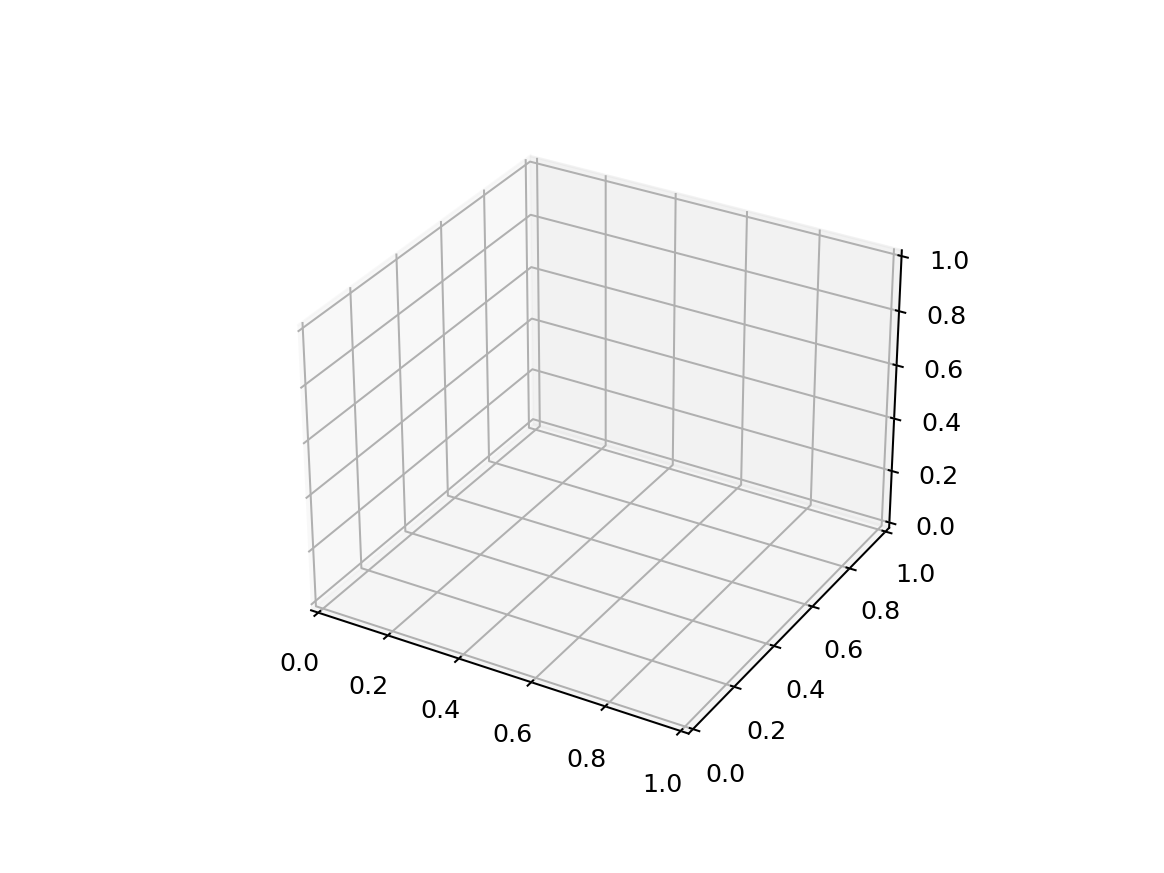

### Use the slider to change theta

interactive(children=(FloatSlider(value=0.0, description='theta', max=4.0, min=-4.0, step=0.04), Output()), _d…

<function __main__.<lambda>(theta)>

In [5]:
display(Markdown('### Displays a pure translation along z'))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
v = np.array([0,0,1]) #pure translation along z of 4
w = np.array([0,0,0]) #no rotation
display(Markdown('### Use the slider to change theta'))
interact(lambda theta: display_cube(ax,v,w,theta), theta=(-4.0,4.0,0.04))

## A pure rotation about a point l about the z axis
We can write the pure rotation by $\theta$ about the point $l$ in exponential coordinates as $w = \begin{bmatrix} 0\\ 0 \\ \theta \end{bmatrix}$ and $v = -w \times l = - \begin{bmatrix} 0\\0\\\theta  \end{bmatrix} \times \begin{bmatrix} l_x\\l_y \\ l_z  \end{bmatrix} = \begin{bmatrix}-\theta l_y \\ \theta l_x \\ 0 \end{bmatrix}$ and the resulting transform will be $T = e^{\begin{bmatrix} \widehat{w} & v\\ 0 & 0\end{bmatrix}} = \begin{bmatrix} cos \theta & -sin \theta & 0 & l_x (1-cos \theta) + l_y sin \theta\\ sin \theta & cos \theta & 0 & - l_x sin \theta + l_y (1-cos \theta) \\ 0 & 0 & 1 & 0 \\ 0&0&0& 1 \end{bmatrix}$

### Displays a rotation about a point l about the z axis

<IPython.core.display.Javascript object>


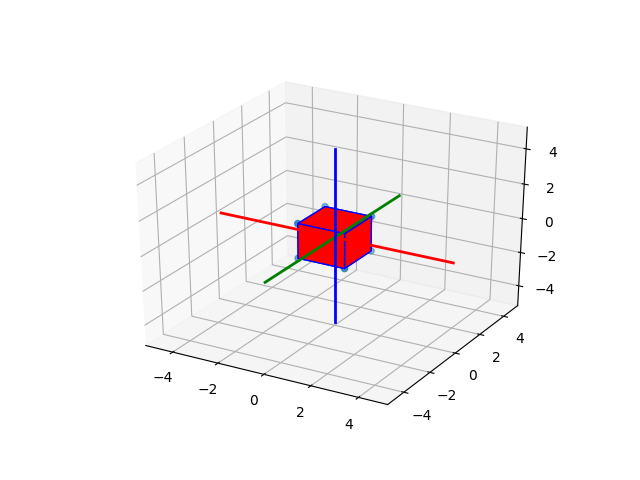

### Use the slider to change theta

interactive(children=(FloatSlider(value=-0.0015926535897929917, description=u'theta', max=3.141592653589793, min=-3.141592653589793, step=0.01), Output()), _dom_classes=('widget-interact',))

<function __main__.<lambda>>

In [5]:
display(Markdown('### Displays a rotation about a point l about the z axis'))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
w = np.array([0,0,1]) #rotation around z
l = np.array([2,0,0]) #arbitrary choice for l
display(Markdown('### Use the slider to change theta'))
interact(lambda theta: display_cube(ax,np.array([l[1],-l[0],0]),w,theta), theta=(-pi,pi,0.01))

In [6]:
#some check